In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw/24V-ERK101__Informe_Completo_2022-06-04_08-32-07_Seguimiento del sensor.csv', encoding='utf-8', sep=',', index_col=0)
df.head(5)

,Fecha y Hora,Coordenadas,Localización,Aceleracion Frenadas*,Altitud*,Bateria Respaldo*,Bateria Vehiculo*,Curso*,eng_eff_on_fuelconsmath*,Ignicion*,Kilometraje*,Velocidad*,Tarjeta*,Tarjetas*,Velocidad,Conductor,Unnamed: 17
№,,,,,,,,,,,,,,,,,
1,2022-05-01 00:54:45,"4.595856, -74.137886","Kennedy, Colombia, Bogotá, Avenida Carrera 68 ...",----,2578.90 mt,85.00 %,24.17 V,25.00 º,----,Off,131836.80 km,0.00 Km/h,----,----,0 km/h,----,NaN
2,2022-05-01 01:54:33,"4.595856, -74.137886","Kennedy, Colombia, Bogotá, Avenida Carrera 68 ...",----,2578.90 mt,85.00 %,24.17 V,25.00 º,1.00,Off,131836.80 km,0.00 Km/h,----,----,0 km/h,----,NaN
3,2022-05-01 02:54:38,"4.595856, -74.137886","Kennedy, Colombia, Bogotá, Avenida Carrera 68 ...",----,2578.90 mt,84.00 %,24.16 V,25.00 º,1.00,Off,131836.80 km,0.00 Km/h,----,----,0 km/h,----,NaN
4,2022-05-01 03:55:15,"4.595856, -74.137886","Kennedy, Colombia, Bogotá, Avenida Carrera 68 ...",----,2578.90 mt,84.00 %,24.17 V,25.00 º,1.00,Off,131836.80 km,0.00 Km/h,----,----,0 km/h,----,NaN
5,2022-05-01 04:00:16,"4.595856, -74.137886","Kennedy, Colombia, Bogotá, Avenida Carrera 68 ...",----,2578.90 mt,----,----,25.00 º,----,----,131836.80 km,0.00 Km/h,----,----,0 km/h,----,NaN


## Data Cleaning

In [3]:
#Data tranformation to datetype
df['datetime'] = pd.to_datetime(df['Fecha y Hora'], errors='raise')
df['date'] = df['datetime'].dt.date
df['day'] = df['datetime'].dt.weekday
df['hour'] = df['datetime'].dt.hour

In [4]:
#Replace empty values for NAN
df = df.replace(r'----', np.nan, regex=True)

In [5]:
#Split coordinates
df[['LAT', 'LON']] = df['Coordenadas'].str.split(',', 1, expand=True)
df[['LAT']] = df[['LAT']].apply(pd.to_numeric)
df[['LON']] = df[['LON']].apply(pd.to_numeric) 
df['LAT_LON'] = df['LAT'].round(3).astype('str') + ',' + df['LON'].round(3).astype('str')

In [6]:
#Variable transformation (string to numeric)
df[['altitude', 'st']] = df['Altitud*'].str.split(' ', 1, expand=True) 
df = df.drop('st', axis=1)
df[['altitude']] = df[['altitude']].apply(pd.to_numeric)


df[['backup_battery', 'st']] = df['Bateria Respaldo*'].str.split(' ', 1, expand=True) 
df = df.drop('st', axis=1) 
df[['backup_battery']] = df[['backup_battery']].apply(pd.to_numeric) 


df[['battery_charge', 'st']] = df['Bateria Vehiculo*'].str.split(' ', 1, expand=True) 
df = df.drop('st', axis=1) 
df[['battery_charge']] = df[['battery_charge']].apply(pd.to_numeric)


df[['course', 'st']] = df['Curso*'].str.split(' ', 1, expand=True) 
df = df.drop('st', axis=1)
df[['course']] = df[['course']].apply(pd.to_numeric)


df[['mileage', 'st']] = df['Kilometraje*'].str.split(' ', 1, expand=True) 
df = df.drop('st', axis=1) 
df[['mileage']] = df[['mileage']].apply(pd.to_numeric)

df[['speed', 'st']] = df['Velocidad*'].str.split(' ', 1, expand=True) 
df = df.drop('st', axis=1) 
df[['speed']] = df[['speed']].apply(pd.to_numeric)

df[['eng_eff_on_fuelconsmath*']] = df[['eng_eff_on_fuelconsmath*']].apply(pd.to_numeric)

#Localization variables

df['country'] = df['Localización'].str.split(',').str[1]
df['city'] = df['Localización'].str.split(',').str[2]
df['location'] = df['Localización'].str.split(',').str[0]
df['address'] = df['Localización'].str.split(',', n=3).str[3]

df['eng_eff'] = df['eng_eff_on_fuelconsmath*'].astype('float32')
df['ignition'] = df['Ignicion*'].map({'Off': False, 'On': True})

df = df.drop('Altitud*', axis=1)
df = df.drop('Bateria Respaldo*', axis=1)
df = df.drop('Bateria Vehiculo*', axis=1)
df = df.drop('Curso*', axis=1)
df = df.drop('Kilometraje*', axis=1)
df = df.drop('Velocidad*', axis=1)
df = df.drop('Velocidad', axis=1)
df = df.drop('Tarjeta*', axis=1) 
df = df.drop('Tarjetas*', axis=1)
df = df.drop('Conductor', axis=1)
df = df.drop('Unnamed: 17', axis=1)
df = df.drop('Fecha y Hora', axis=1)
df = df.drop('Coordenadas', axis=1)
df = df.drop('Localización', axis=1)
df = df.drop('Aceleracion Frenadas*', axis=1)
df = df.drop('Ignicion*', axis=1)
df = df.drop('eng_eff_on_fuelconsmath*', axis=1)

df = df.set_index(pd.DatetimeIndex(df['datetime']), drop=True)
df.drop(columns=['datetime'], inplace=True)


Pasando localizacion a minusculas

In [7]:
df['country'] = df['country'].str.lower()
df['city'] = df['city'].str.lower()
df['location'] = df['location'].str.lower()

In [8]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.lower(), b.lower())
    return s


In [9]:
def tilde(df):
  a = []
  for i in df:
    a.append(normalize(i))
  return a

In [10]:
p = tilde(df['city'])
l = tilde(df['location'])

In [11]:
df['city'] = p
df['location'] = l

In [12]:
df

,date,day,hour,LAT,LON,LAT_LON,altitude,backup_battery,battery_charge,course,mileage,speed,country,city,location,address,eng_eff,ignition
datetime,,,,,,,,,,,,,,,,,,
2022-05-01 00:54:45,2022-05-01,6,0,4.595856,-74.137886,"4.596,-74.138",2578.9,85.0,24.17,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,False
2022-05-01 01:54:33,2022-05-01,6,1,4.595856,-74.137886,"4.596,-74.138",2578.9,85.0,24.17,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-01 02:54:38,2022-05-01,6,2,4.595856,-74.137886,"4.596,-74.138",2578.9,84.0,24.16,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-01 03:55:15,2022-05-01,6,3,4.595856,-74.137886,"4.596,-74.138",2578.9,84.0,24.17,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-01 04:00:16,2022-05-01,6,4,4.595856,-74.137886,"4.596,-74.138",2578.9,NaN,NaN,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 19:37:42,2022-05-31,1,19,4.595771,-74.138013,"4.596,-74.138",2583.3,91.0,24.71,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,False
2022-05-31 20:37:47,2022-05-31,1,20,4.595771,-74.138013,"4.596,-74.138",2583.3,90.0,24.68,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-31 21:38:14,2022-05-31,1,21,4.595771,-74.138013,"4.596,-74.138",2583.3,90.0,24.64,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False


## EDA

In [13]:
df.describe()
#df.city.unique()
df = df[(df['city'] == ' bogota') | (df['city'] == ' cundinamarca')]


** This preliminary vision to the data shows a big picture of the information of our vehicule, we see an average spped of 8 km/h, something that is quite interesting because this might suggests that the vehicule is extremely slow, but we must keep in mind that we are including data points with the vehicule completely out of service.

In [14]:
df1 = df[df['ignition']==False]
df1

,date,day,hour,LAT,LON,LAT_LON,altitude,backup_battery,battery_charge,course,mileage,speed,country,city,location,address,eng_eff,ignition
datetime,,,,,,,,,,,,,,,,,,
2022-05-01 00:54:45,2022-05-01,6,0,4.595856,-74.137886,"4.596,-74.138",2578.9,85.0,24.17,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,False
2022-05-01 01:54:33,2022-05-01,6,1,4.595856,-74.137886,"4.596,-74.138",2578.9,85.0,24.17,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-01 02:54:38,2022-05-01,6,2,4.595856,-74.137886,"4.596,-74.138",2578.9,84.0,24.16,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-01 03:55:15,2022-05-01,6,3,4.595856,-74.137886,"4.596,-74.138",2578.9,84.0,24.17,25.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-01 04:00:40,2022-05-01,6,4,4.595832,-74.137770,"4.596,-74.138",2607.3,85.0,0.00,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 19:37:42,2022-05-31,1,19,4.595771,-74.138013,"4.596,-74.138",2583.3,91.0,24.71,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,False
2022-05-31 20:37:47,2022-05-31,1,20,4.595771,-74.138013,"4.596,-74.138",2583.3,90.0,24.68,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False
2022-05-31 21:38:14,2022-05-31,1,21,4.595771,-74.138013,"4.596,-74.138",2583.3,90.0,24.64,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,False


**After checking the information of the vehicule with the Ignition=Off, we see an average speed of 0.001475, probably a metric that included movements of the vehicule during reparations or during car reparations.

In [15]:
df1 = df[df['ignition']==True]
df1

,date,day,hour,LAT,LON,LAT_LON,altitude,backup_battery,battery_charge,course,mileage,speed,country,city,location,address,eng_eff,ignition
datetime,,,,,,,,,,,,,,,,,,
2022-05-02 03:59:04,2022-05-02,0,3,4.595832,-74.137770,"4.596,-74.138",2607.3,NaN,NaN,0.0,NaN,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:49:52,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,73.0,25.79,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:50:37,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,73.0,28.49,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:51:37,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,73.0,28.41,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:52:40,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,98.0,28.44,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 18:36:00,2022-05-31,1,18,4.595693,-74.138246,"4.596,-74.138",2582.0,92.0,28.30,81.0,134486.8,11.0,colombia,bogota,kennedy,Calle 40 Sur 68 20,10.8,True
2022-05-31 18:37:03,2022-05-31,1,18,4.595791,-74.138047,"4.596,-74.138",2581.7,92.0,28.10,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,10.8,True
2022-05-31 18:38:00,2022-05-31,1,18,4.595791,-74.138047,"4.596,-74.138",2581.7,92.0,26.89,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True


**With the Ignition=On, we see an average speed of 8km/h, this probably needs further investigation, but we might suggest traffic issues as one of the main explanations for this number. We can see an average altitude of 2390 mts over the sea level, Bogota is located 2600 mts over the sea level, and its surrounding areas have this altitude on average too, so it's possible that the main work area for this vehicule is located around Bogota. 

In [16]:
df1['city'][df1['city']== 'bosa']

Series([], Name: city, dtype: object)

In [17]:
df2 = pd.DataFrame(df.groupby(['ignition','location'])['speed'].mean())

In [18]:
df2 = df2.reset_index()

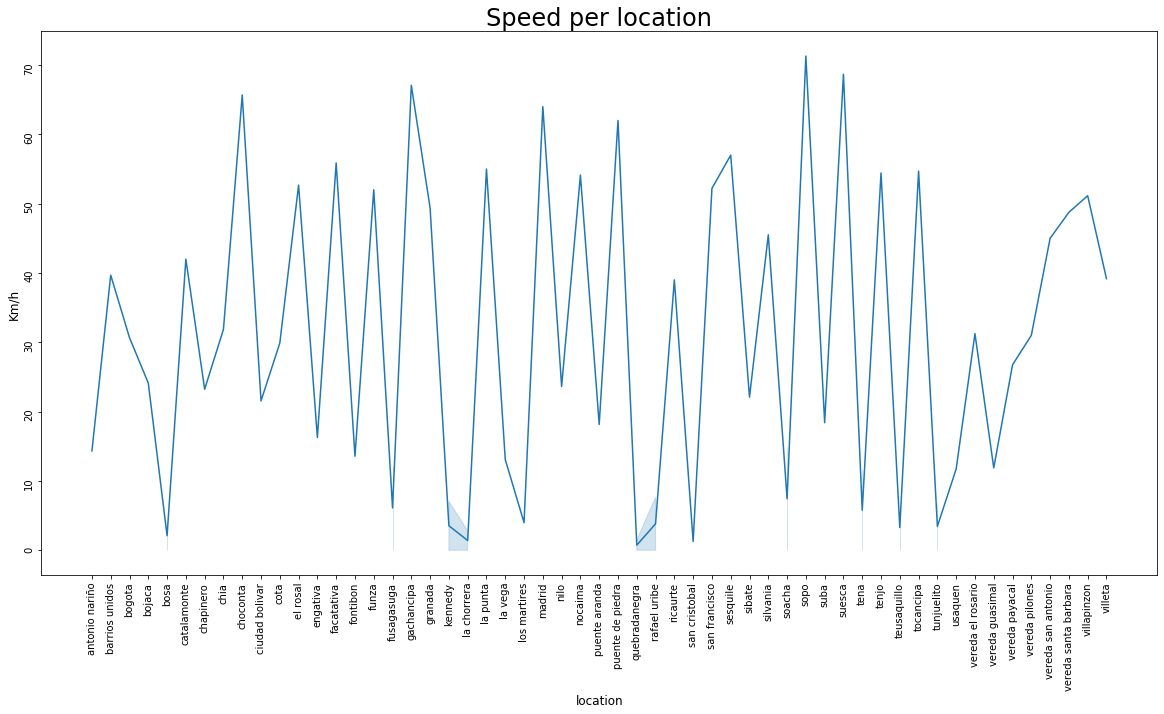

In [19]:
#Speed verification per location
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
  
# Plot the scatterplot
sns.lineplot(data=df2, x="location", y="speed")
ax.tick_params(labelrotation=90)
# Set label for x-axis
ax.set_xlabel( "location" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Km/h" , size = 12 )
  
# Set title for plot
ax.set_title( "Speed per location" , size = 24 )
  
# Display figure
plt.show()

**After associating the speed metric to a location, it's possible to see a big variation across locations, and the main explanation for this is the highway regulation (the lowest numbers are mostly located in urban areas where the maximum permitted is 30km/h, and the highest metrics are in highways or outside urban areas where the maximum is 80km/h).

In [20]:
df3 = pd.DataFrame(df.groupby(['ignition', 'day'])['speed'].mean())
df3 = df3.reset_index()

In [21]:
df1

,date,day,hour,LAT,LON,LAT_LON,altitude,backup_battery,battery_charge,course,mileage,speed,country,city,location,address,eng_eff,ignition
datetime,,,,,,,,,,,,,,,,,,
2022-05-02 03:59:04,2022-05-02,0,3,4.595832,-74.137770,"4.596,-74.138",2607.3,NaN,NaN,0.0,NaN,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:49:52,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,73.0,25.79,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:50:37,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,73.0,28.49,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:51:37,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,73.0,28.41,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True
2022-05-02 04:52:40,2022-05-02,0,4,4.595874,-74.137802,"4.596,-74.138",2578.1,98.0,28.44,0.0,131836.8,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31 18:36:00,2022-05-31,1,18,4.595693,-74.138246,"4.596,-74.138",2582.0,92.0,28.30,81.0,134486.8,11.0,colombia,bogota,kennedy,Calle 40 Sur 68 20,10.8,True
2022-05-31 18:37:03,2022-05-31,1,18,4.595791,-74.138047,"4.596,-74.138",2581.7,92.0,28.10,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,10.8,True
2022-05-31 18:38:00,2022-05-31,1,18,4.595791,-74.138047,"4.596,-74.138",2581.7,92.0,26.89,245.0,134486.9,0.0,colombia,bogota,kennedy,Avenida Carrera 68 39I S 97,1.0,True


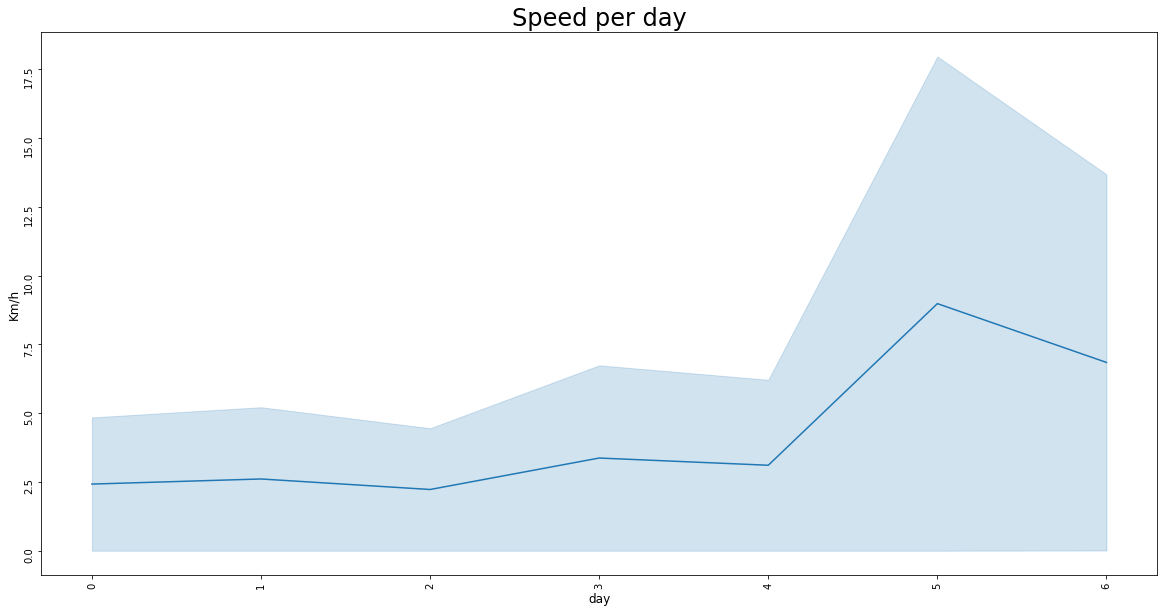

In [22]:
#Speed verification per day of the week
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
  
# Plot the scatterplot
sns.lineplot(data=df3, x="day", y="speed")
ax.tick_params(labelrotation=90)
# Set label for x-axis
ax.set_xlabel( "day" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Km/h" , size = 12 )
  
# Set title for plot
ax.set_title( "Speed per day" , size = 24 )
  
# Display figure
plt.show()

**Focusing our analysis on the ignition=On, we can see that from monday (0) to friday (4), the vehicule has low speed on average, and on the weekends experiments an increase in it's speed. This might suggest that it has a different way of working depending on the day of the week. It would be useful to see the distribution of the vehicule usage per day of the week to spot some trends. 

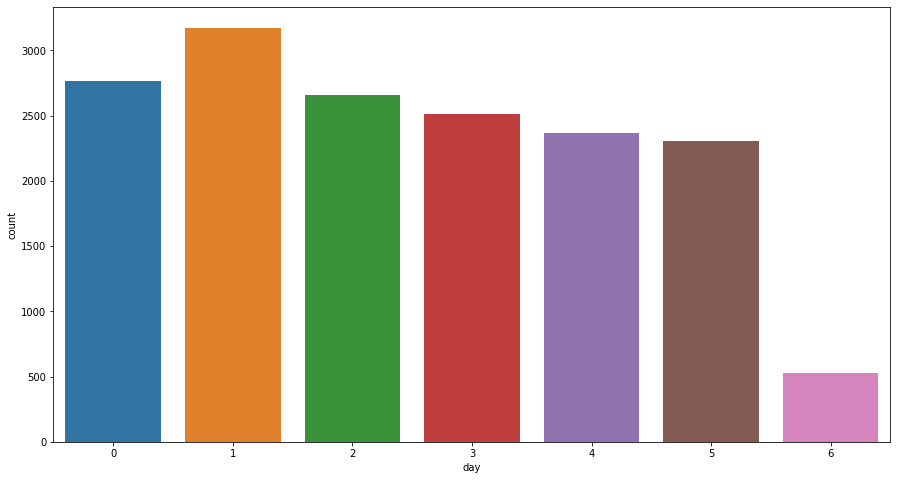

In [23]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=df, x='day', ax=ax)
plt.show()

**We see a sustained usage from monday to saturday, and a big drop on sundays, showing that this vehicule works most of the week, and on saturdays has its day off. So now it's time to locate it's usage to better understand its behavior.

In [24]:
#Time between locations
df['time_range'] = df.index.to_series().shift(-1) - df.index.to_series()
df_vel = df[(df['speed'] <= 20) & (df['ignition'] == True) & (df.hour>=18)] 


/home/ayepesp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
import folium  #needed for interactive map
from folium.plugins import HeatMap

my_zip = zip(df_vel['LAT'], df_vel['LON'], df_vel['time_range'].dt.total_seconds())
list_of_my_zip = list(my_zip)

hm_layer = HeatMap(list_of_my_zip,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map.add_child(hm_layer)
folium_map

**The center of operation for the vehicule is the south of Bogota, mostly the location of Bosa (one of the most populated areas of the city), and the main avenue to reach 'outliers', or to move to other locations is 30th avenue, from wich it's possible to reach the north of the city and even reach other towns, wich apparently is a side usage of the vehicule.

In [26]:
#Monday map
df_vel1 = df[(df['ignition'] == True) & (df['day']==0)& (df.hour>=18)] 
my_zip1 = zip(df_vel1['LAT'], df_vel1['LON'], df_vel1['time_range'].dt.total_seconds())
list_of_my_zip1 = list(my_zip1)

hm_layer1 = HeatMap(list_of_my_zip1,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map1 = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map1.add_child(hm_layer1)
folium_map1



** Reviewing the monday usage, we see it mostly ocncentrated on a location (Bosa), and we don't see long distance movements, so that average speed of 5km/h would be explained by the heavy traffic on the neighborhoods located in this location (an extremely populated area) that receives a huge amount of vehicules including public transport, and it also shows the little offer of avenues and its deterioration. 

In [27]:
#Tuesday map
df_vel2 = df[(df['ignition'] == True) & (df['day']==1)] 
df_vel2 = df_vel2[['LAT', 'LON', 'time_range']]
df_vel2 = df_vel2.dropna()
my_zip2 = zip(df_vel2['LAT'], df_vel2['LON'], df_vel2['time_range'].dt.total_seconds())
list_of_my_zip2 = list(my_zip2)

hm_layer2 = HeatMap(list_of_my_zip2,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map2 = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map2.add_child(hm_layer2)
folium_map2



In [28]:
#Wednesday map
df_vel3 = df[(df['ignition'] == True) & (df['day']==2)] 
df_vel3 = df_vel2[['LAT', 'LON', 'time_range']]
df_vel3 = df_vel3.dropna()
my_zip3 = zip(df_vel3['LAT'], df_vel3['LON'], df_vel3['time_range'].dt.total_seconds())
list_of_my_zip3 = list(my_zip3)

hm_layer3 = HeatMap(list_of_my_zip3,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map3 = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map3.add_child(hm_layer3)
folium_map3



In [29]:
#Thursday map
df_vel4 = df[(df['ignition'] == True) & (df['day']==3)& (df.hour>=18)] 
df_vel4 = df_vel4[['LAT', 'LON', 'time_range']]
df_vel4 = df_vel4.dropna()
my_zip4 = zip(df_vel4['LAT'], df_vel4['LON'], df_vel4['time_range'].dt.total_seconds())
list_of_my_zip4 = list(my_zip4)

hm_layer4 = HeatMap(list_of_my_zip4,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map4 = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map4.add_child(hm_layer4)
folium_map4



In [30]:
#Friday map
df_vel5 = df[(df['ignition'] == True) & (df['day']==4)& (df.hour>=18)] 
df_vel5 = df_vel5[['LAT', 'LON', 'time_range']]
df_vel5 = df_vel5.dropna()
my_zip5 = zip(df_vel5['LAT'], df_vel5['LON'], df_vel5['time_range'].dt.total_seconds())
list_of_my_zip5 = list(my_zip5)

hm_layer5 = HeatMap(list_of_my_zip4,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map5 = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map5.add_child(hm_layer5)
folium_map5


In [31]:
#Saturday map
df_vel6 = df[(df['ignition'] == True) & (df['day']==5)& (df.hour>=18)] 
df_vel6 = df_vel6[['LAT', 'LON', 'time_range']]
df_vel6 = df_vel6.dropna()
my_zip6 = zip(df_vel6['LAT'], df_vel6['LON'], df_vel6['time_range'].dt.total_seconds())
list_of_my_zip6 = list(my_zip6)

hm_layer6 = HeatMap(list_of_my_zip6,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map6 = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map6.add_child(hm_layer6)
folium_map6


In [32]:
#Sunday map
df_vel7 = df[(df['ignition'] == True) & (df['day']==6)] 
df_vel7 = df_vel7[['LAT', 'LON', 'time_range']]
df_vel7 = df_vel7.dropna()
my_zip7 = zip(df_vel7['LAT'], df_vel7['LON'], df_vel7['time_range'].dt.total_seconds())
list_of_my_zip7 = list(my_zip7)

hm_layer7 = HeatMap(list_of_my_zip7,
                   # These are parameters that we tweak manually to adjust color
                   # See folium docs for more information
                   min_opacity=0.3,
                   radius=6,
                   blur=5,
                 )

bo_coords = [4.65, -74.1] # lat, long
folium_map7 = folium.Map(location=bo_coords, zoom_start=12, tiles="OpenStreetMap")
folium_map7.add_child(hm_layer7)
folium_map7


**From monday to friday we can see a pattern of use, pretty much the same streets and locations (mostly urban areas within the south of the city), so the low speed is understandable.

**Saturday shows more destinations outside the city, and it shoes more distance covered, so this sudden increase in average speed is understandable since highways offer more possibilities of acceleration and their speed limit is higher.

**On sundays we don't see as much movement as saturdays, but we see locations outside the city, so the average speed should be higher compared to the weekdays. 

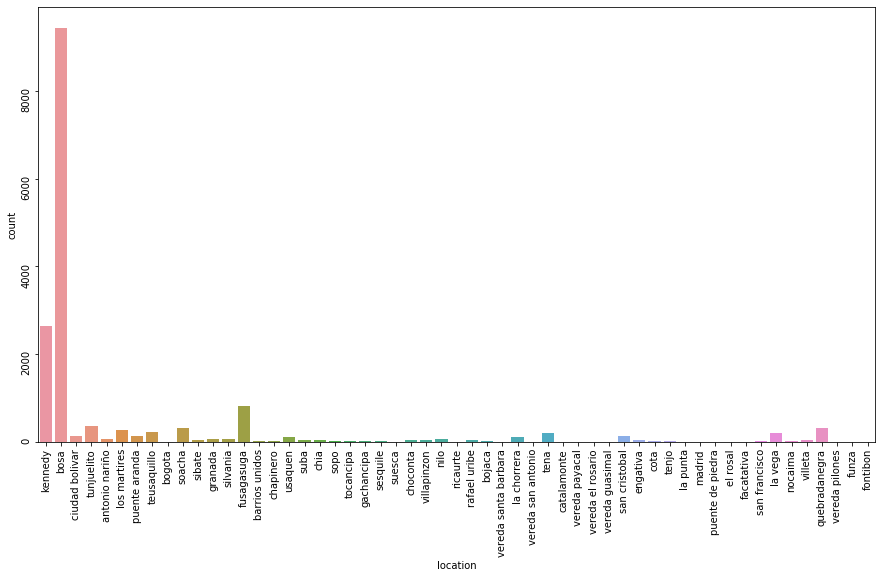

In [33]:
#Distribution of activity per location
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=df, x='location', ax=ax)
ax.tick_params(labelrotation=90)
plt.show()

**This bar graph confirms what we saw on our maps, most of the action of our vehicule is concentrated in the location of Bosa, confirming that our vehicule is specialized on this zone of the city, and only moves occasionaly or on sepcial events. 

## Corr

In [45]:
df1.speed = df1.where(df1['speed']>1)['speed']
df1.eng_eff = df1.where(df1['eng_eff']>10)['eng_eff']
corr_df= df1.corr(method='pearson')
corr_df

/home/ayepesp/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,day,hour,LAT,LON,altitude,backup_battery,battery_charge,course,mileage,speed,eng_eff
day,1.000000,0.031929,0.103266,-0.249815,-0.394152,-0.090766,0.093699,-0.098270,0.133234,0.395111,0.384524
hour,0.031929,1.000000,-0.024067,-0.051635,-0.043089,-0.318504,0.029844,-0.033222,0.021820,-0.055283,-0.025531
LAT,0.103266,-0.024067,1.000000,0.263000,0.117534,-0.063403,0.016536,0.058008,0.170350,0.146649,0.239987
LON,-0.249815,-0.051635,0.263000,1.000000,0.866409,0.059331,0.036064,-0.053391,-0.129995,0.008742,0.044097
altitude,-0.394152,-0.043089,0.117534,0.866409,1.000000,0.078297,0.008898,0.054853,-0.195191,-0.206602,-0.239250
backup_battery,-0.090766,-0.318504,-0.063403,0.059331,0.078297,1.000000,0.198344,0.039249,-0.075485,-0.058301,-0.099448
battery_charge,0.093699,0.029844,0.016536,0.036064,0.008898,0.198344,1.000000,-0.153038,-0.005920,0.174416,0.109847
course,-0.098270,-0.033222,0.058008,-0.053391,0.054853,0.039249,-0.153038,1.000000,-0.078796,-0.095463,-0.091271
mileage,0.133234,0.021820,0.170350,-0.129995,-0.195191,-0.075485,-0.005920,-0.078796,1.000000,0.092245,0.080748
speed,0.395111,-0.055283,0.146649,0.008742,-0.206602,-0.058301,0.174416,-0.095463,0.092245,1.000000,0.744781


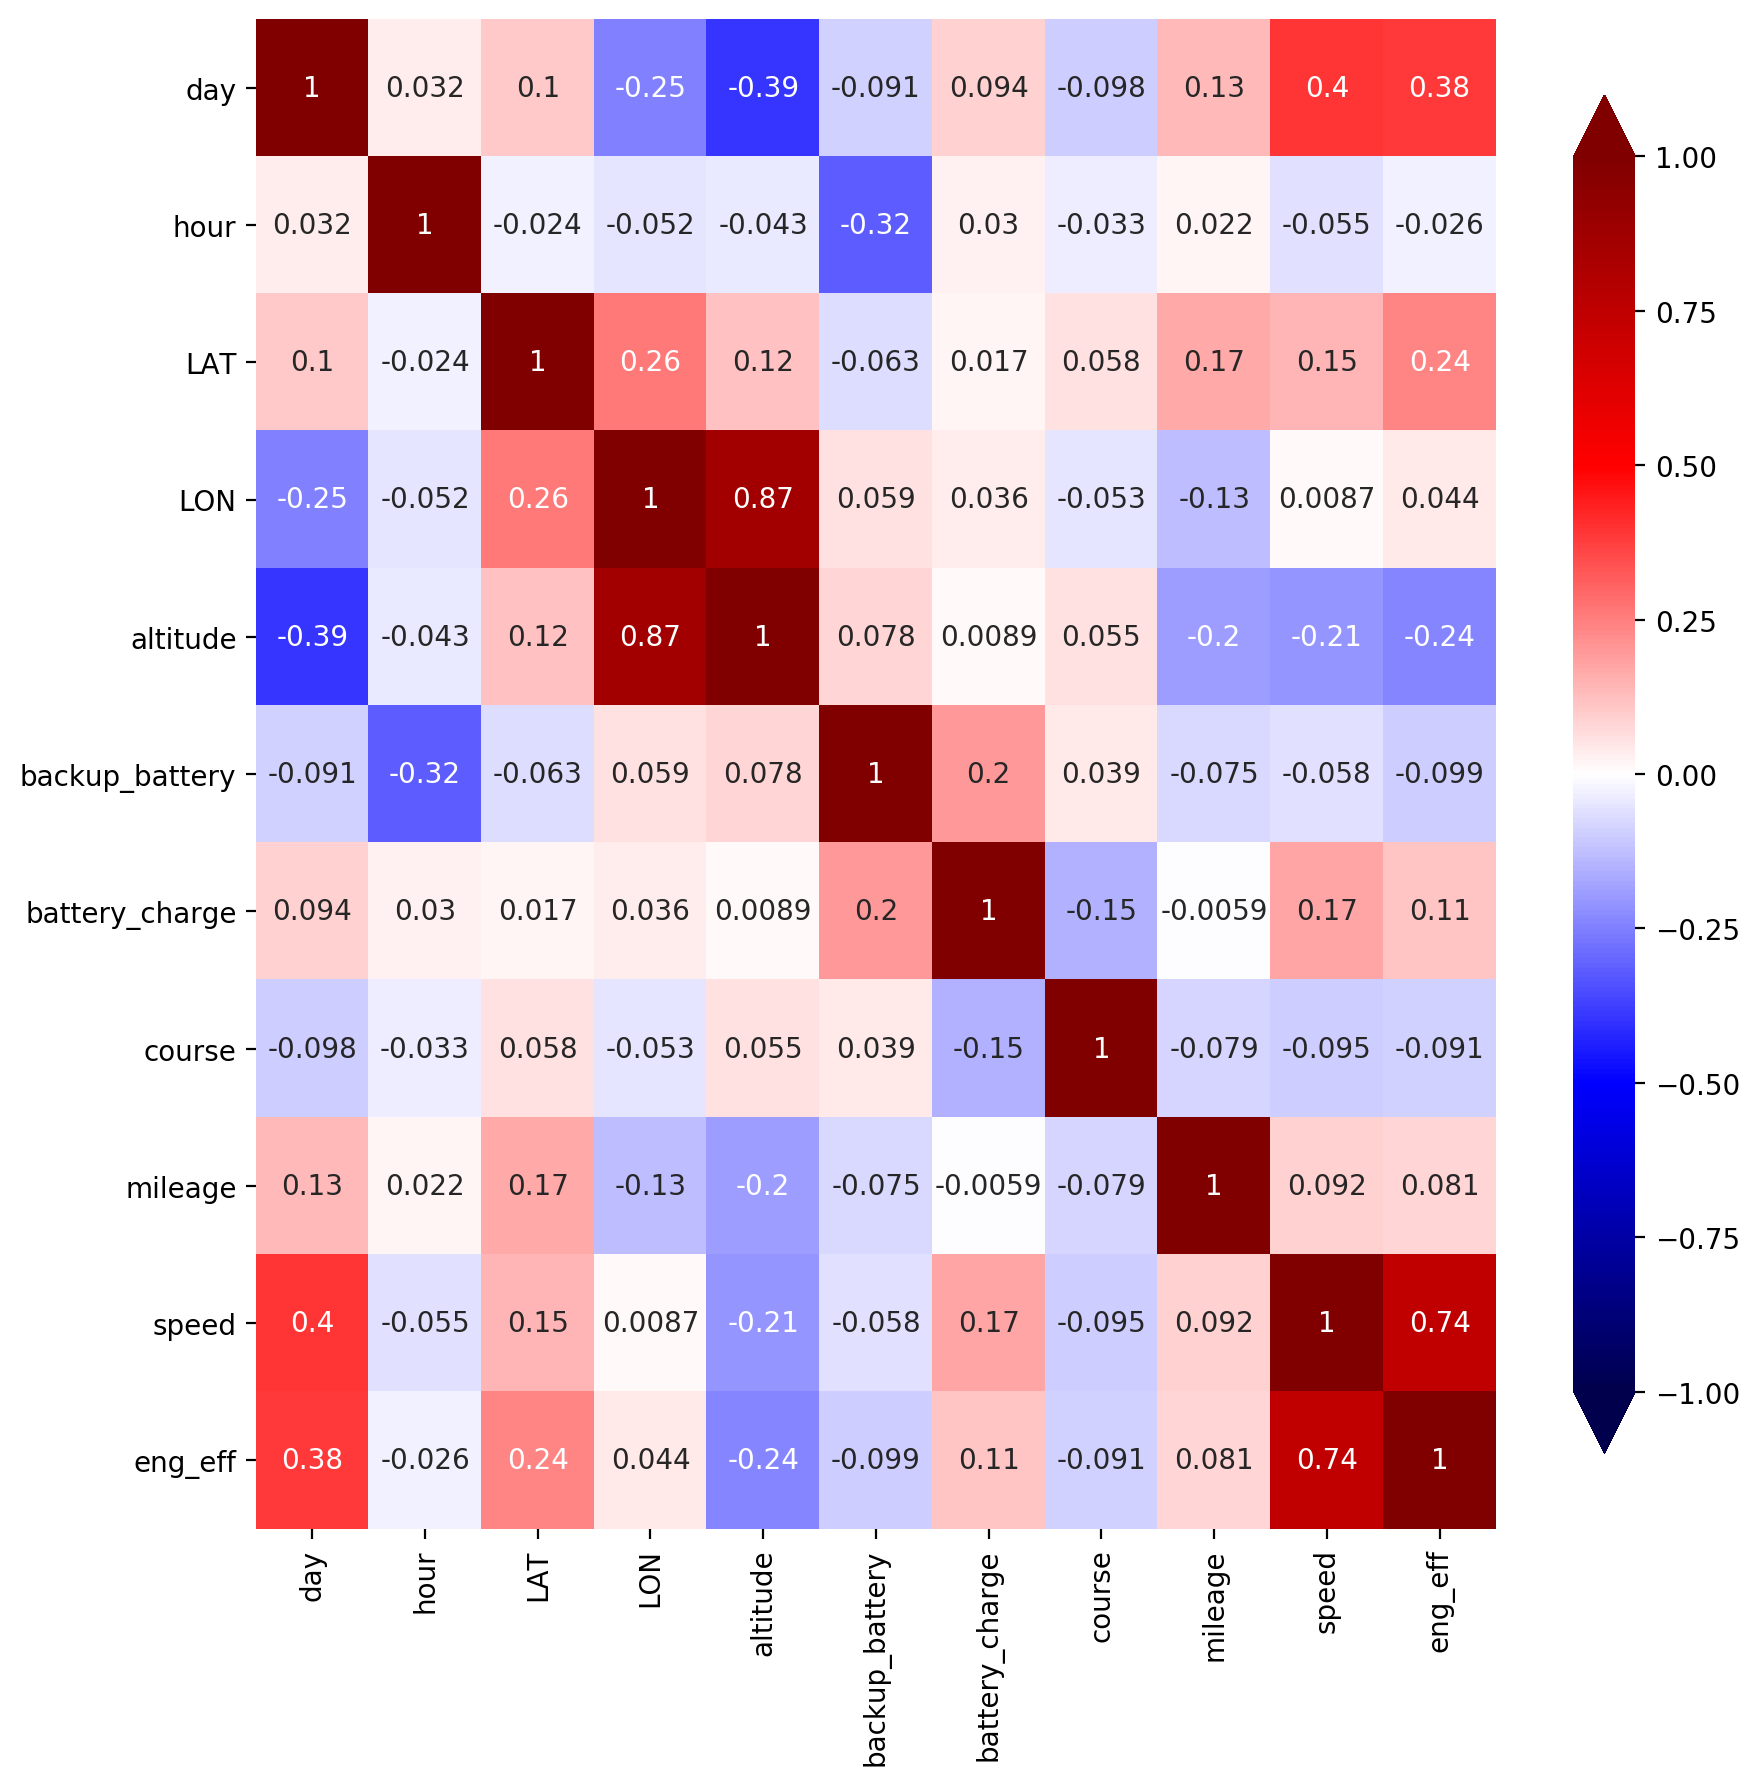

In [57]:
plt.figure(figsize=(10,10 ),dpi=200)
sns.heatmap(corr_df, annot=True,vmin=-1,vmax=1,cmap='seismic',cbar_kws={"shrink": .9,'extend':'both'})
plt.show()

* Hay correlacion entre la carga de la bateria y la velocidad
* Hay correlacion entre la carga de la bateria y eng_eff
* Hay correlacion entre la velocidad y eng_eff
* Hay correlacion entre la velocidad y el dia
* Hay correlacion entre la millas y el dia
* Hay correlacion entre los dias y eng_eff
* Hay correlacion entre la velocidad y la latitud
* Hay correlacion entre la bateria de respaldo y la carga de la bateria
* Hay correlacion entre la bateria de respaldo y eng_eff

Analicemos un poco estas variables:


**carga de la bateria y la velocidad**

In [47]:
df2 = pd.DataFrame(df1.groupby(['speed'])['battery_charge'].mean())
df3 = pd.DataFrame(df1.groupby(["eng_eff"])['battery_charge'].mean())
print(df3)
df4 = pd.DataFrame(df1.groupby(["eng_eff"])['speed'].median())
print(df4)
df5 = pd.DataFrame(df1.groupby(["day"])['speed'].mean())
df6 = pd.DataFrame(df1.groupby(["day"])['mileage'].mean())
df7 = pd.DataFrame(df1.groupby(["day"])['eng_eff'].mean())

           battery_charge
eng_eff                  
10.800000       28.135024
10.890000       28.383333
10.980000       28.340385
11.070000       28.333200
11.160000       28.338571
...                   ...
18.309999       28.310000
18.400000       28.298889
18.490000       28.380000
18.580000       28.388571
18.670000       28.372857

[89 rows x 1 columns]
           speed
eng_eff         
10.800000   22.0
10.890000   37.5
10.980000   35.5
11.070000   38.5
11.160000   36.5
...          ...
18.309999   75.0
18.400000   76.0
18.490000   77.5
18.580000   78.0
18.670000   81.0

[89 rows x 1 columns]


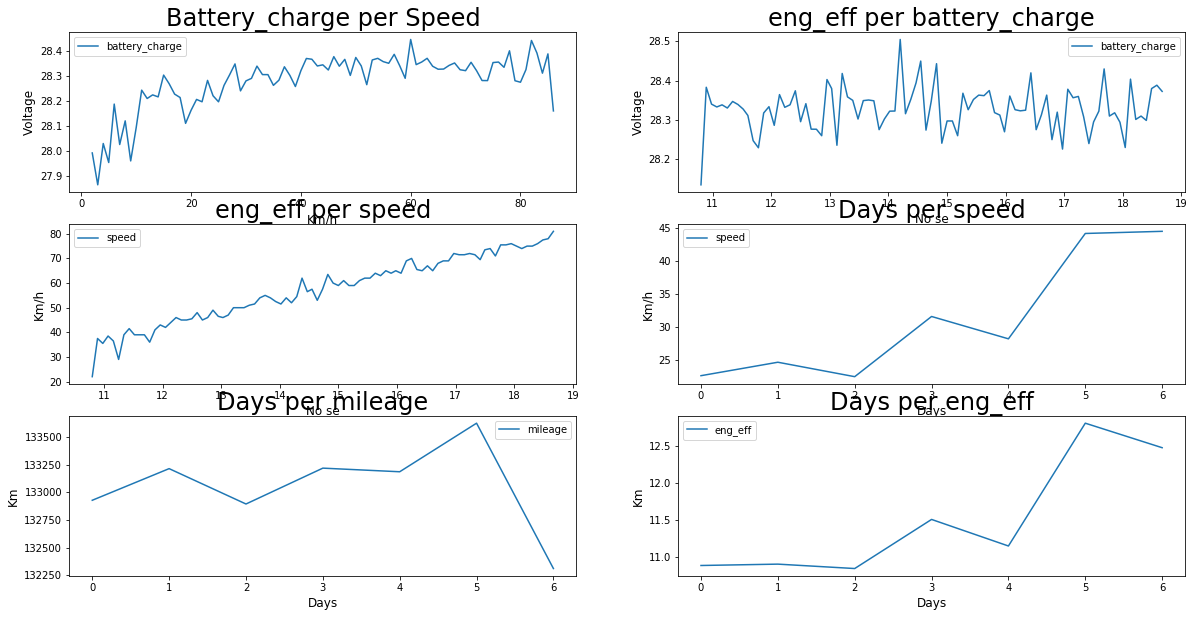

In [48]:
#Speed verification per location
fig, axes = plt.subplots(3,2,figsize = ( 20 , 10 ))
# Plot the scatterplot
sns.lineplot(ax= axes[0][0],data=df2)
ax.tick_params(labelrotation=90)
# Batery vs Speed
axes[0][0].set_ylabel( "Voltage" , size = 12 )
axes[0][0].set_xlabel( "Km/h" , size = 12 )
axes[0][0].set_title( "Battery_charge per Speed" , size = 24 )
sns.lineplot(ax= axes[0][1],data=df3)
ax.tick_params(labelrotation=90)
# Batery vs eng_eff
axes[0][1].set_ylabel( "Voltage" , size = 12 )
axes[0][1].set_xlabel( "No se" , size = 12 )
axes[0][1].set_title( "eng_eff per battery_charge" , size = 24 )
sns.lineplot(ax= axes[1][0],data=df4)
ax.tick_params(labelrotation=90)
# eng_eff vs speed
axes[1][0].set_ylabel( "Km/h" , size = 12 )
axes[1][0].set_xlabel( "No se" , size = 12 )
axes[1][0].set_title( "eng_eff per speed" , size = 24 )
sns.lineplot(ax= axes[1][1],data=df5)
ax.tick_params(labelrotation=90)
# Day vs speed
axes[1][1].set_ylabel( "Km/h" , size = 12 )
axes[1][1].set_xlabel( "Days" , size = 12 )
axes[1][1].set_title( "Days per speed" , size = 24 )
sns.lineplot(ax= axes[2][0],data=df6)
ax.tick_params(labelrotation=90)
# Day vs mileage
axes[2][0].set_ylabel( "Km" , size = 12 )
axes[2][0].set_xlabel( "Days" , size = 12 )
axes[2][0].set_title( "Days per mileage" , size = 24 )
sns.lineplot(ax= axes[2][1],data=df7)
ax.tick_params(labelrotation=90)
# Day vs eng_eff
axes[2][1].set_ylabel( "Km" , size = 12 )
axes[2][1].set_xlabel( "Days" , size = 12 )
axes[2][1].set_title( "Days per eng_eff" , size = 24 )
plt.show()